In [4]:
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.



Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load data

In [6]:
data=pd.read_csv("./IPL Matches 2008-2020.csv")

In [7]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [12]:
# drop the column of method
data.drop(['method'],axis=1,inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  umpire1          816 non-null    object 
 15  umpire2          816 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 102.1+ KB


# Most Win Team

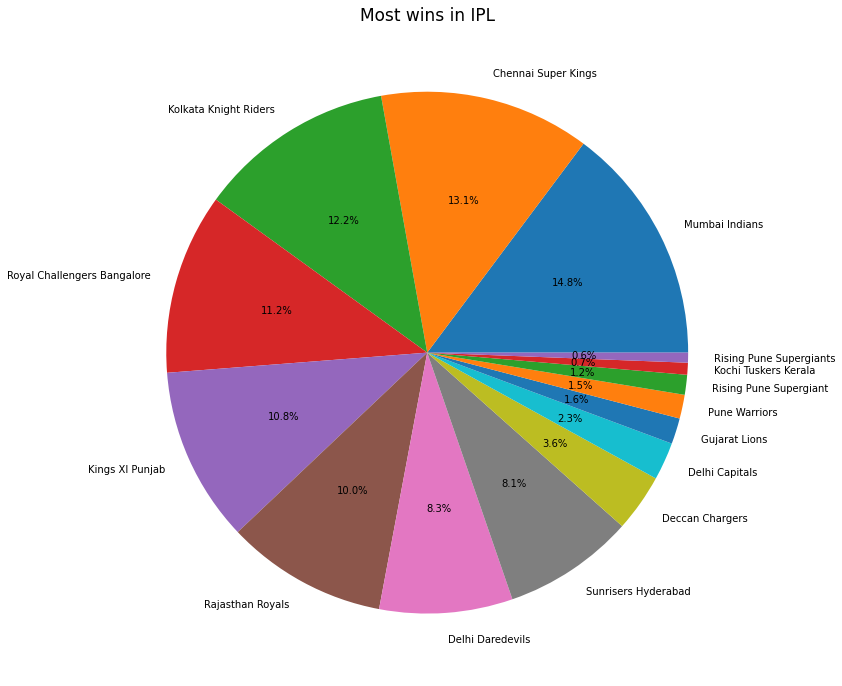

In [24]:
temp=pd.DataFrame({"Winner":data['winner']})
counts_wins=temp.value_counts()
#print(counts_wins)
labels=[X[0] for X in counts_wins.keys()]
bar,ax=plt.subplots(figsize=(20,12))
ax=plt.pie(x=counts_wins,autopct="%.1f%%",labels=labels)
plt.title("Most wins in IPL",fontsize=17)
plt.show()

# Most Wins Eliminator

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


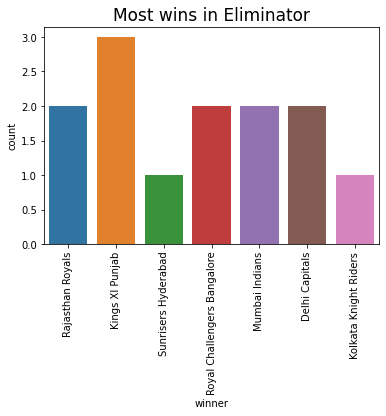

In [26]:
sns.countplot(data['winner'][data['eliminator']=='Y'],data=data)
plt.title("Most wins in Eliminator",fontsize=17)
plt.xticks(rotation=90)
plt.show()

# Toss Decision

In [37]:
teams=data['toss_winner'].unique()
decision_making=pd.DataFrame([],columns=['Toss Winner','Decision','Times'])

for id,element in enumerate(teams):
    temp_bat=data[(data['toss_winner']==element) & (data['toss_decision']=='bat')]
    temp_fields=data[(data['toss_winner']==element) & (data['toss_decision']=='field')]
    
    
    decision_making=decision_making.append({'Toss Winner':element,'Decision':'bat','Times':temp_bat['toss_winner'].count()},ignore_index=True)
    
    decision_making=decision_making.append({'Toss Winner':element,'Decision':'fields','Times':temp_bat['toss_winner'].count()},ignore_index=True)

    


In [38]:
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,24
1,Royal Challengers Bangalore,fields,24
2,Chennai Super Kings,bat,51
3,Chennai Super Kings,fields,51
4,Rajasthan Royals,bat,34
5,Rajasthan Royals,fields,34
6,Mumbai Indians,bat,48
7,Mumbai Indians,fields,48
8,Deccan Chargers,bat,24
9,Deccan Chargers,fields,24


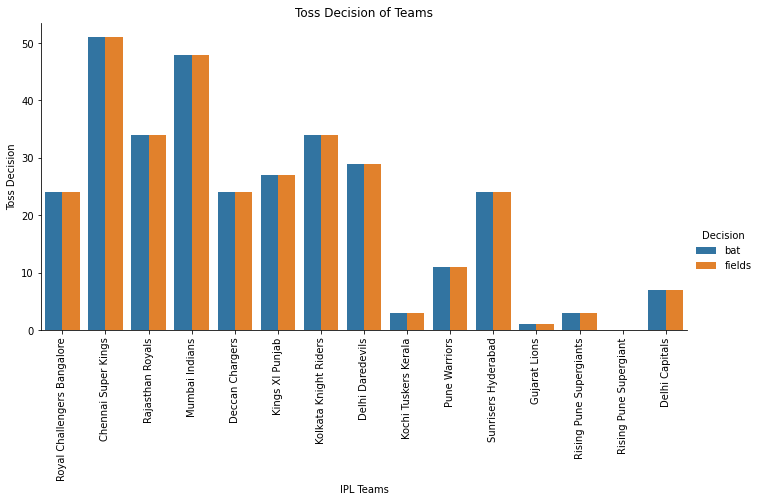

In [39]:
sns.catplot(x='Toss Winner',y='Times',hue="Decision",data=decision_making,kind='bar',height=5,aspect=2)
plt.xticks(rotation=90)
plt.title("Toss Decision of Teams")
plt.xlabel("IPL Teams")
plt.ylabel("Toss Decision")
plt.show()

# Famous Venue

Text(0, 0.5, 'Venue')

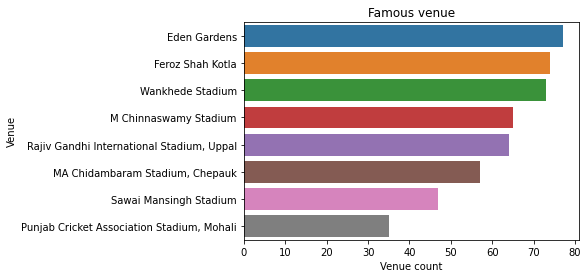

In [40]:
sns.barplot(x=data['venue'].value_counts().head(8).values,
           y=data['venue'].value_counts().head(8).index,
           data=data)
plt.title("Famous venue")
plt.xlabel("Venue count")
plt.ylabel("Venue")

# Top 5 Umpire_1

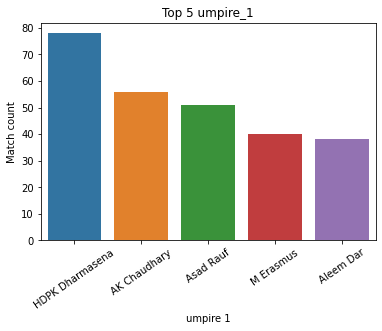

In [42]:
sns.barplot(x=data['umpire1'].value_counts().head().index,
           y=data['umpire1'].value_counts().head().values,data=data)
plt.xticks(rotation=35)
plt.xlabel("umpire 1")
plt.ylabel("Match count")
plt.title("Top 5 umpire_1")
plt.show()

# Top 5 umpire_2

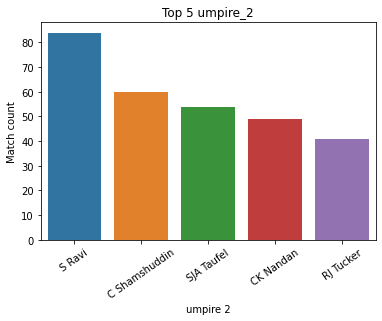

In [43]:
sns.barplot(x=data['umpire2'].value_counts().head().index,
           y=data['umpire2'].value_counts().head().values,data=data)
plt.xticks(rotation=35)
plt.xlabel("umpire 2")
plt.ylabel("Match count")
plt.title("Top 5 umpire_2")
plt.show()